In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
using Plots
include("pixel_data.jl")

interpolate_roc (generic function with 1 method)

In [3]:
data_dir = "pixel_data"
q, ylocal, pt = get_samples(data_dir, 1:4)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 

In [4]:
nz_q = filter(x -> x != 0.0, q)

85650715-element Vector{Float64}:
  -0.1
  -0.1
  -0.1
 -10.5
 -23.1
 -30.8
 -33.2
 -32.1
 -29.0
 -24.7
 -19.7
 -14.2
  -8.5
   ⋮
  -0.7
  -0.8
  -0.7
  -0.6
  -0.5
  -0.3
  -0.1
  -0.1
  -0.3
  -0.3
  -0.3
  -0.1

In [5]:
using Statistics: quantile

In [6]:
low = quantile(nz_q, 0.001)

-690.2

In [9]:
hi = quantile(nz_q, 0.999)

15064.528599999845

In [10]:
most_qs = filter(x->(x > low) && (x < hi), nz_q)

85479380-element Vector{Float64}:
  -0.1
  -0.1
  -0.1
 -10.5
 -23.1
 -30.8
 -33.2
 -32.1
 -29.0
 -24.7
 -19.7
 -14.2
  -8.5
   ⋮
  -0.7
  -0.8
  -0.7
  -0.6
  -0.5
  -0.3
  -0.1
  -0.1
  -0.3
  -0.3
  -0.3
  -0.1

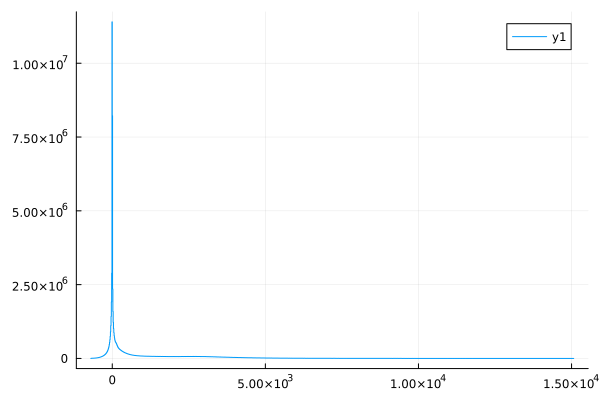

In [11]:
histogram(most_qs)

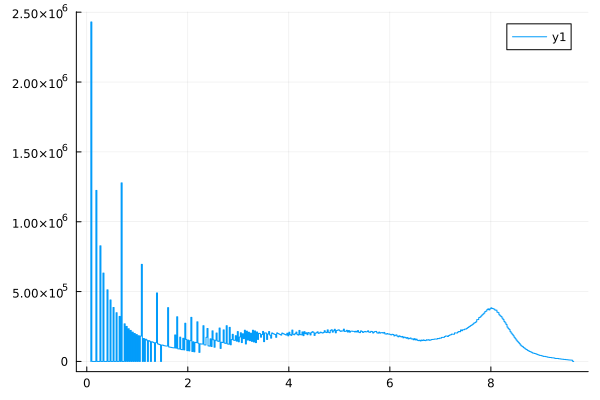

In [12]:
histogram(log1p.(abs.(most_qs)))

In [17]:
function scale_charge(i::AbstractArray)
    lo = -690.0
    hi = 15000.0
    #clamp to within (0.001, 0.999 quantiles)
    i = clamp.(i, lo, hi)
    #scale with 99.99% at 6 sigma
    i = 6.0 .* i ./ hi
    return i
end

scale_charge (generic function with 1 method)

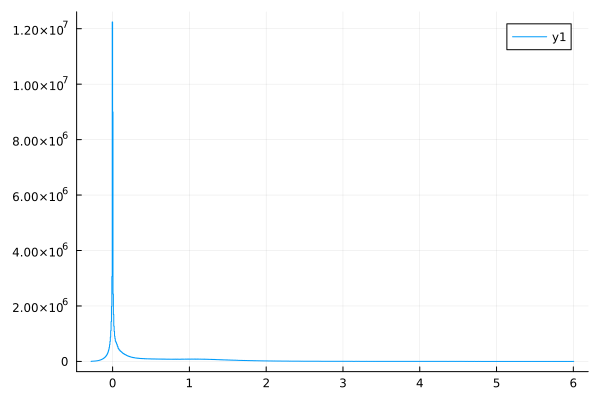

In [18]:
histogram(scale_charge(most_qs))